In [24]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import os
import csv
import pathlib

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#tenserflow
import tensorflow as tf

#Keras
import keras

In [6]:
# Example of Blues music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/blues/blues.00080.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [10]:
IPython.display.Audio(data=y, rate=sr)

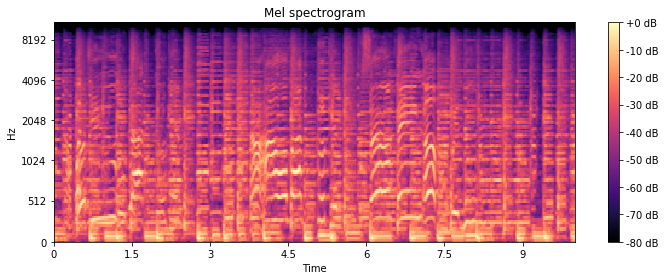

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [13]:
# Example of Metal music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/metal/metal.00024.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

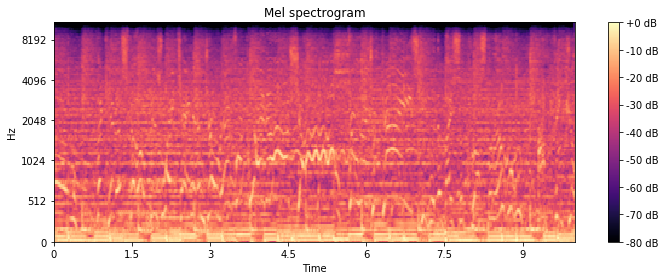

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [19]:
# Example of Rock music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [20]:
IPython.display.Audio(data=y, rate=sr)

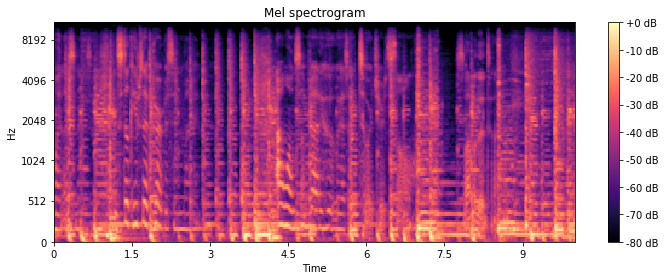

In [16]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

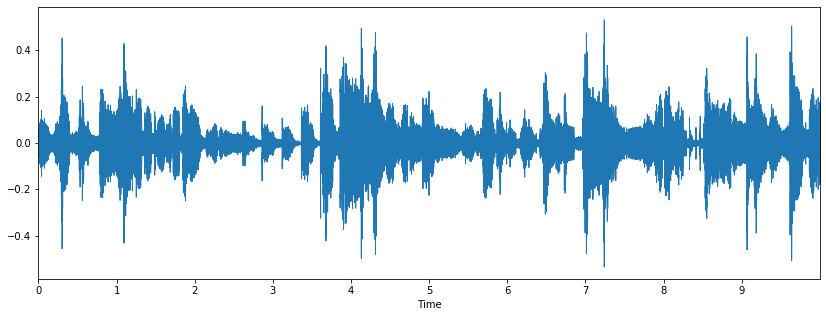

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)


## Extracting the Spectrogram for every Audio

- <b>Zero Crossing Rate</b>: The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
- <b>Spectral Centroid</b>: It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
- <b>Spectral Rolloff</b>: It is a measure of the shape of the signal.
- <b>Mel-Frequency Cepstral Coefficients</b>: The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which describe the overall shape of a spectral envelope.
- <b>Chroma Frequencies</b>: 

In [26]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}'):
        songname = f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [37]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


 ## Writing data to csv file

In [42]:
file = open('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}'):
        songname = f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'  
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [44]:
data = pd.read_csv('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
filename              1000 non-null object
chroma_stft           1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12                1000 non-null float64
mfcc13                1000 non-null float64
mfcc14                1000 non-null float64
mfcc15         